In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Importing Boston Housing Dataset

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)

Scaling the Data using MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
#fitting the scaler
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
#transforming the the train and test data
X_train_normalized=scaler.transform(X_train)
X_test_normalized=scaler.transform(X_test)


Viewing the scaled data

In [ ]:
X_train_normalized

array([[9.60549795e-04, 0.00000000e+00, 1.31598240e-01, ...,
        4.25531915e-01, 9.96469817e-01, 1.97503467e-01],
       [5.63336716e-04, 4.00000000e-01, 2.18108504e-01, ...,
        5.31914894e-01, 1.00000000e+00, 4.46601942e-02],
       [1.11745683e-03, 0.00000000e+00, 1.00000000e+00, ...,
        7.97872340e-01, 9.82878612e-01, 4.47988904e-01],
       ...,
       [2.70765792e-04, 0.00000000e+00, 1.73387097e-01, ...,
        8.08510638e-01, 9.94729941e-01, 2.39667129e-01],
       [5.78015841e-03, 0.00000000e+00, 2.10410557e-01, ...,
        5.10638298e-01, 9.78692824e-01, 2.11373093e-01],
       [2.76127157e-03, 0.00000000e+00, 3.71334311e-01, ...,
        6.38297872e-01, 9.81163952e-01, 4.47711512e-01]])

In [ ]:
#Determing the Shape of the Data
X_test_normalized.shape,X_train_normalized.shape

((102, 13), (404, 13))

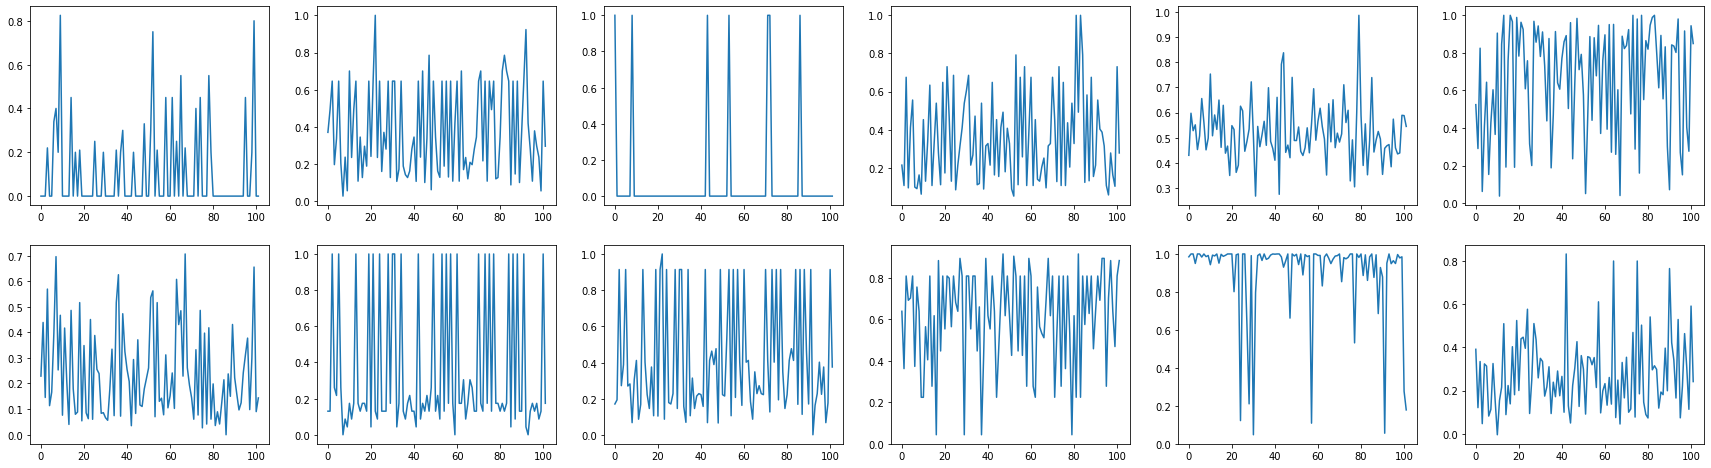

In [ ]:
plt.figure(figsize=(30,30))
for i in range(12):
  plt.subplot(7,6,i+1)
  plt.plot(X_test_normalized[:,i+1:i+2])


Creating a Model

In [ ]:
#Setting Random Seed
tf.random.set_seed(42)

#creating the model
housing_model=tf.keras.Sequential([
                     tf.keras.layers.Dense(100),              
                     tf.keras.layers.Dense(10),              
                     tf.keras.layers.Dense(1)

])
#Compiling the model
housing_model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics='mae')

#Fitting the model
history=housing_model.fit(X_train_normalized,y_train,epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 2ms/step - loss: 20.6727 - mae: 20.6727
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 18.3752 - mae: 18.3752
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 15.5348 - mae: 15.5348
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 12.4530 - mae: 12.4530
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 10.0395 - mae: 10.0395
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 8.8344 - mae: 8.8344
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 8.2309 - mae: 8.2309
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 7.5801 - mae: 7.5801
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 7.0014 - mae: 7.0014
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 6.4336 - mae: 6.4336
Epoch 11/50
13/13 [==============================] - 0s 2ms

Evaluating the model

In [ ]:
housing_model.evaluate(X_test_normalized,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.9741 - mae: 2.9741


[2.9740779399871826, 2.9740779399871826]

Plotting Learning Curve

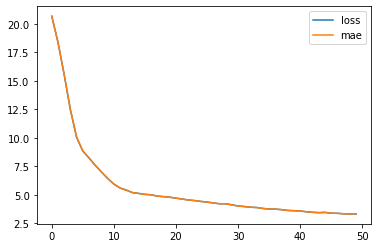

In [ ]:
pd.DataFrame(history.history).plot()